## **물고기 별 몸무게 예측 모델(다중선형회귀, 다항회귀)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

# Customize the default style
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

import seaborn as sns

In [3]:
df = pd.read_csv('csv/fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### **1. Perch의 몸무게 예측하는 모델**

In [5]:
perch = df[df["Species"] == "Perch"]
perch.shape

(56, 7)

In [6]:
perch_data = perch[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
perch_target = perch["Weight"]

In [7]:
perch_data.head()

,Length1,Length2,Length3,Height,Width
72,7.5,8.4,8.8,2.1120,1.4080
73,12.5,13.7,14.7,3.5280,1.9992
74,13.8,15.0,16.0,3.8240,2.4320
75,15.0,16.2,17.2,4.5924,2.6316
76,15.7,17.4,18.5,4.5880,2.9415


In [8]:
perch_target.head()

72     5.9
73    32.0
74    40.0
75    51.5
76    70.0
Name: Weight, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()

train_input, test_input, train_target, test_target = train_test_split(perch_data, perch_target, test_size = 0.2, random_state = 0)
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(44, 5) (44,)
(12, 5) (12,)


In [10]:
from sklearn.preprocessing import PolynomialFeatures
perch_poly = PolynomialFeatures(degree = 2, include_bias = False)
perch_poly.fit(train_input)
train_poly = perch_poly.transform(train_input)
test_poly = perch_poly.transform(test_input)
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9955739474805669
0.9702759062881382


In [11]:
perch_predict = lr.predict(test_poly)
print(perch_poly.get_feature_names())

print("회귀 계수 값: ", np.round(lr.coef_, 2))
print("y 절편 값: ", np.round(lr.intercept_, 2))
print(perch_predict)

['x0', 'x1', 'x2', 'x3', 'x4', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x2^2', 'x2 x3', 'x2 x4', 'x3^2', 'x3 x4', 'x4^2']
회귀 계수 값:  [ -81.11 -176.28  259.   -260.21  190.75  -88.07    7.36  173.82 -228.15
  231.48  330.29 -617.55  194.46 -383.67  198.22   12.34  161.02   32.49
  -27.22    3.6 ]
y 절편 값:  90.24
[728.06172072 259.71198437 793.59961432 200.3571396  119.51125445
  72.08757316 258.94985861 687.48745678 896.60741442 278.64087328
  51.18252907 113.58361609]


In [12]:
import numpy as np

array = np.array([-81.11, -176.28, 259., -260.21, 190.75, -88.07, 7.36, 173.82, -228.15, 231.48, 330.29, -617.55, 194.46,
                  -383.67, 198.22, 12.34, 161.02, 32.49, -27.22, 3.6])

                                                                    
coef_array = np.insert(array, [10, 14, 14, 17,17,17, 19,19,19,19], [array[6], array[7], array[11], array[8], array[12], array[15], array[9], array[13], array[16], array[18]])

coef = np.round(coef_array, 2).reshape(6,5)
coef_df = pd.DataFrame(coef)
coef_df.columns = (['Length1', 'Length2', 'Length3', 'Height', 'Width'])
coef_df.index = ([['1','Length1', 'Length2', 'Length3', 'Height', 'Width']])
coef_df

,Length1,Length2,Length3,Height,Width
1,-81.11,-176.28,259.00,-260.21,190.75
Length1,-88.07,7.36,173.82,-228.15,231.48
Length2,7.36,330.29,-617.55,194.46,-383.67
Length3,173.82,-617.55,198.22,12.34,161.02
Height,-228.15,194.46,12.34,32.49,-27.22
Width,231.48,-383.67,161.02,-27.22,3.60


#### **각각의 회귀 변수에 대한 산점도, 선형회귀 그래프**

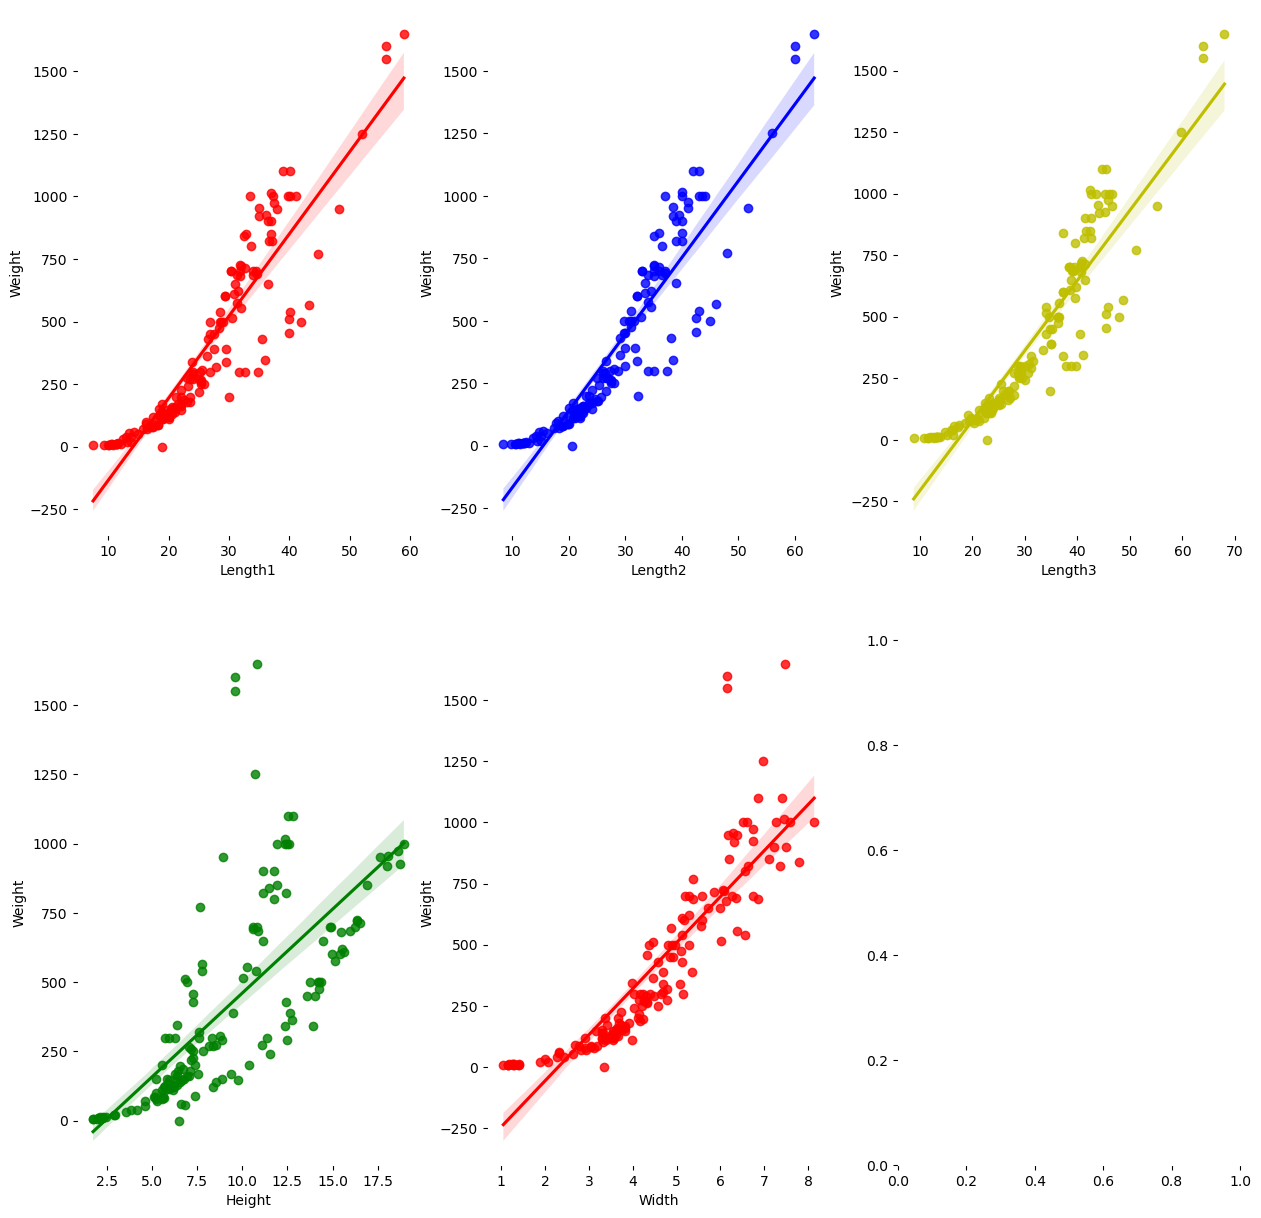

In [13]:
ax1, ax2= plt.subplots(figsize = (15,15), ncols =3, nrows =2)
x_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y="Weight", data = df, ax=ax2[row][col], color=plot_color[i])
    
plt.show()

#### **직접 데이터 입력하여 새로운 perch의 무게 예측**

In [14]:
length1_test = float(input("첫번째 길이를 입력하시오"))
length2_test = float(input("두번째 길이를 입력하시오"))
length3_test = float(input("세번째 길이를 입력하시오"))
height_test = float(input("키를 입력하시오"))
width_test = float(input("너비를 입력하시오"))

new_data_poly = perch_poly.transform([[length1_test, length2_test, length3_test, height_test, width_test]])
perch_weight_predict = lr.predict(new_data_poly)

print()
print(f'이 perch의 무게는 약 {np.round(perch_weight_predict, 2)} 일 것입니다.')

첫번째 길이를 입력하시오 31
두번째 길이를 입력하시오 33
세번째 길이를 입력하시오 35
키를 입력하시오 10
너비를 입력하시오 6

이 perch의 무게는 약 [516.96] 일 것입니다.


### **2. Bream의 몸무게 예측하는 모델**

In [17]:
bream = df[df["Species"] == "Bream"]
bream.shape
bream.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [18]:
bream_data = bream[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
bream_target = bream["Weight"]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()

train_input, test_input, train_target, test_target = train_test_split(bream_data, bream_target, test_size = 0.10, random_state = 42)
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(31, 5) (31,)
(4, 5) (4,)


In [20]:
from sklearn.preprocessing import PolynomialFeatures
bream_poly = PolynomialFeatures(degree = 2, include_bias = False)
bream_poly.fit(train_input)
train_poly = bream_poly.transform(train_input)
test_poly = bream_poly.transform(test_input)
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9743064620651458
0.6044210109402514


In [21]:
bream_predict = lr.predict(test_poly)
print(bream_poly.get_feature_names())

print("회귀 계수 값: ", np.round(lr.coef_, 2))
print("y 절편 값: ", np.round(lr.intercept_, 2))
print(bream_predict)

['x0', 'x1', 'x2', 'x3', 'x4', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x2^2', 'x2 x3', 'x2 x4', 'x3^2', 'x3 x4', 'x4^2']
회귀 계수 값:  [-495.3   451.97  274.58 -770.29  788.83 -242.7   392.94  171.58 -198.26
 -256.42 -166.48  -96.21  -37.48  544.19  -58.69  237.58 -255.83  -13.79
 -115.17   51.82]
y 절편 값:  -1734.46
[747.57993588 527.42135597 739.21165413 644.67516932]


In [22]:
import numpy as np

array = np.array([-495.3,   451.97,  274.58, -770.29,  788.83, -242.7,   392.94,  171.58, -198.26,
 -256.42, -166.48,  -96.21,  -37.48,  544.19,  -58.69,  237.58, -255.83,  -13.79,
 -115.17,   51.82])

                                                                    
coef_array = np.insert(array, [10, 14, 14, 17,17,17, 19,19,19,19], [array[6], array[7], array[11], array[8], array[12], array[15], array[9], array[13], array[16], array[18]])

coef = np.round(coef_array, 2).reshape(6,5)
coef_df = pd.DataFrame(coef)
coef_df.columns = (['Length1', 'Length2', 'Length3', 'Height', 'Width'])
coef_df.index = ([['1','Length1', 'Length2', 'Length3', 'Height', 'Width']])
coef_df

,Length1,Length2,Length3,Height,Width
1,-495.30,451.97,274.58,-770.29,788.83
Length1,-242.70,392.94,171.58,-198.26,-256.42
Length2,392.94,-166.48,-96.21,-37.48,544.19
Length3,171.58,-96.21,-58.69,237.58,-255.83
Height,-198.26,-37.48,237.58,-13.79,-115.17
Width,-256.42,544.19,-255.83,-115.17,51.82


#### **각각의 회귀 변수에 대한 산점도, 선형회귀 그래프**

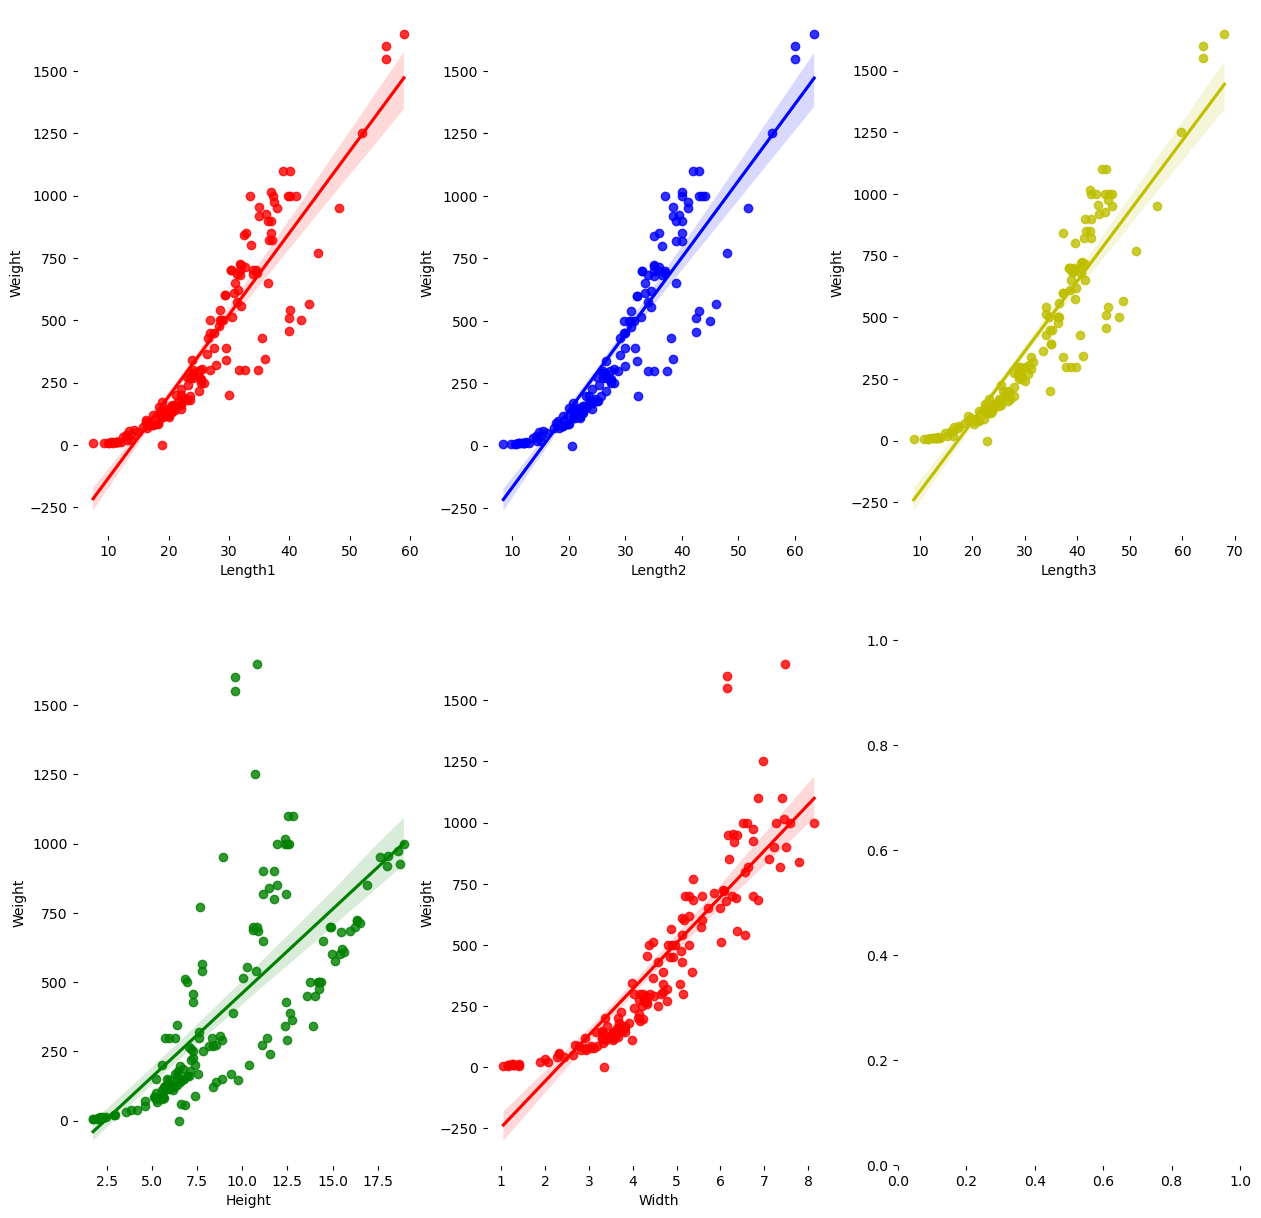

In [23]:
ax1, ax2= plt.subplots(figsize = (15,15), ncols =3, nrows =2)
x_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y="Weight", data = df, ax=ax2[row][col], color=plot_color[i])
    
plt.show()

#### **직접 데이터 입력하여 새로운 bream의 무게 예측**

In [24]:
length1_test = float(input("첫번째 길이를 입력하시오"))
length2_test = float(input("두번째 길이를 입력하시오"))
length3_test = float(input("세번째 길이를 입력하시오"))
height_test = float(input("키를 입력하시오"))
width_test = float(input("너비를 입력하시오"))

new_data_poly_2 = bream_poly.transform([[length1_test, length2_test, length3_test, height_test, width_test]])
bream_weight_predict = lr.predict(new_data_poly_2)

print()
print(f'이 perch의 무게는 약 {np.round(bream_weight_predict, 2)} 일 것입니다.')

첫번째 길이를 입력하시오 25
두번째 길이를 입력하시오 27
세번째 길이를 입력하시오 32
키를 입력하시오 12.5
너비를 입력하시오 4.5

이 perch의 무게는 약 [290.62] 일 것입니다.


Bream에 대한 모델의 정확도가 Perch보다 떨어짐: 데이터 셋의 개수가 너무 적다